In [1]:
#Import libraries necessary for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Load data into dataframe df 
df = pd.read_csv ('D:\LONDON MET\Data Analysis and Visualization\CW\ObesityDataSet_raw_and_data_sinthetic.csv')
df = pd.DataFrame(df)


In [2]:

#Body fat classification is determined by body mass index (BMI), so I calculated BMI and added each individual's BMI as a new column
df['BMI'] = df['Weight']/(df['Height']**2)

#Returns the array dimensions
df.shape

(2111, 18)

In [3]:
#Check how many duplicate rows there are
duplicate_data = df[df.duplicated()]
print(duplicate_data.shape)

#Drop duplicates
df = df.drop_duplicates(keep='last')
df.shape

(24, 18)


(2087, 18)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


<AxesSubplot:>

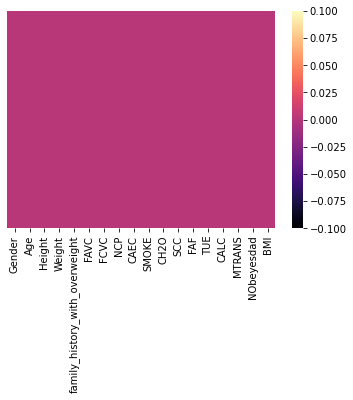

In [5]:
#Check if there are any missing values
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='magma')



In [6]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

### Note:
Eating Habit:
- `FAVC` : Frequent consumption of high caloric food 
- `FCVC` : Frequency of consumption of vegetables
- `NCP` :  Number of main meals   
- `CAEC`: Consumption of food between meals 
- `CH20`: Consumption of water daily 
- `CALC`: Consumption of alcohol

Physical condition:
- `SCC`: Calories consumption monitoring
- `FAF`: Physical activity frequency
- `TUE`: Time using technology devices 
- `MTRANS`:Transportation used 


<AxesSubplot:>

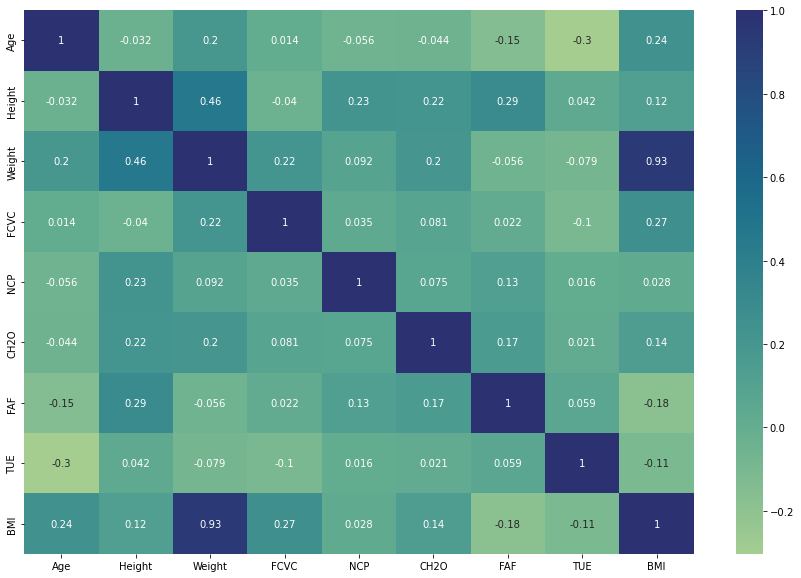

In [8]:
#Correlation matrix
df.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="crest", annot = True)

- Categorical: `Gender`,`family_history_with_overweight`, `FAVC`, `FCVC`, `NCP`, `CAEC`, `SMOKE`, `CH2O`, `SCC`, `FAF`, `TUE`, `CALC`, `MTRANS`, `NObeyesdad`.

- Numerical:  `Age`, `Height`, `BMI`, `Weight`

- Mix types of data: No

- Contain Error/Typo: No

- Blank or Null: No

- Various Data Type: String, Int, Float



In [9]:
# Describe Data Frame
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035,29.765758
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153,8.024934
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000,24.368897
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866,28.896224
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000,36.095538
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


#### Target Variable: `NObeyesdad`

In [10]:
#Check target Variable distribution:
df["NObeyesdad"].value_counts().to_frame()


,NObeyesdad
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


### *How do respondents react to questions with yes-or-no options?*

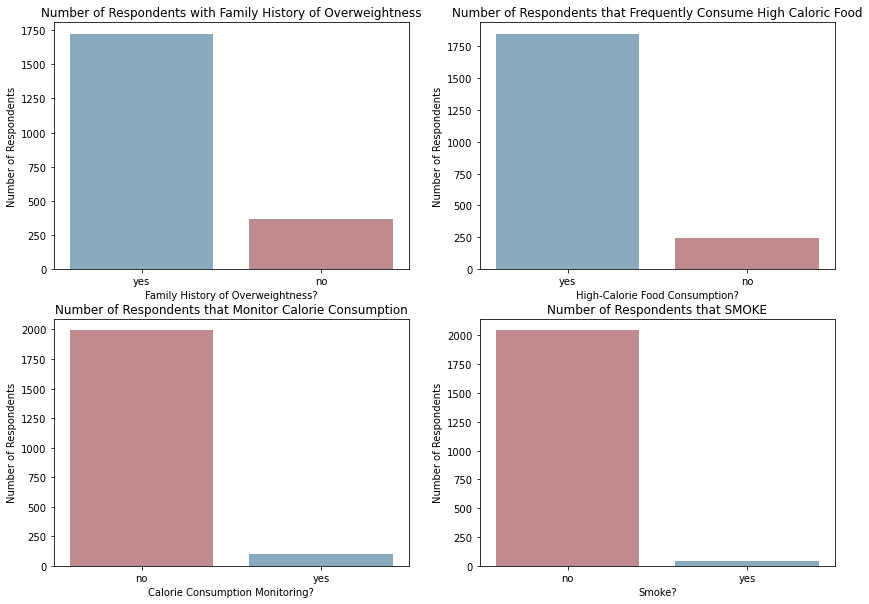

In [11]:
#Suplots
plt.figure(figsize=(14,10))
#Consumption of high caloric food
plt.subplot(2, 2, 2)
plt.title("Number of Respondents that Frequently Consume High Caloric Food")
counts = df["FAVC"].value_counts()
plt.bar(counts.index, counts.values, color = ['#8aabbf', '#bf8a90'])
plt.xlabel("High-Calorie Food Consumption?")
plt.ylabel("Number of Respondents")

#Family history
plt.subplot(2, 2, 1)
plt.title("Number of Respondents with Family History of Overweightness")
counts = df["family_history_with_overweight"].value_counts()
plt.bar(counts.index, counts.values, color = ['#8aabbf', '#bf8a90'])
plt.xlabel("Family History of Overweightness?")
plt.ylabel("Number of Respondents")


#Calorie monitoring
plt.subplot(2, 2, 3)
plt.title("Number of Respondents that Monitor Calorie Consumption")
counts = df["SCC"].value_counts()
plt.bar(counts.index, counts.values, color = ['#bf8a90','#8aabbf'])
plt.xlabel("Calorie Consumption Monitoring?")
plt.ylabel("Number of Respondents")

#Smoking
plt.subplot(2, 2, 4)
plt.title("Number of Respondents that SMOKE")
counts = df["SMOKE"].value_counts()
plt.bar(counts.index, counts.values, color = ['#bf8a90','#8aabbf'])
plt.xlabel("Smoke?")
plt.ylabel("Number of Respondents")
plt.show()

### 2. What is the connection between BMI and other variables?

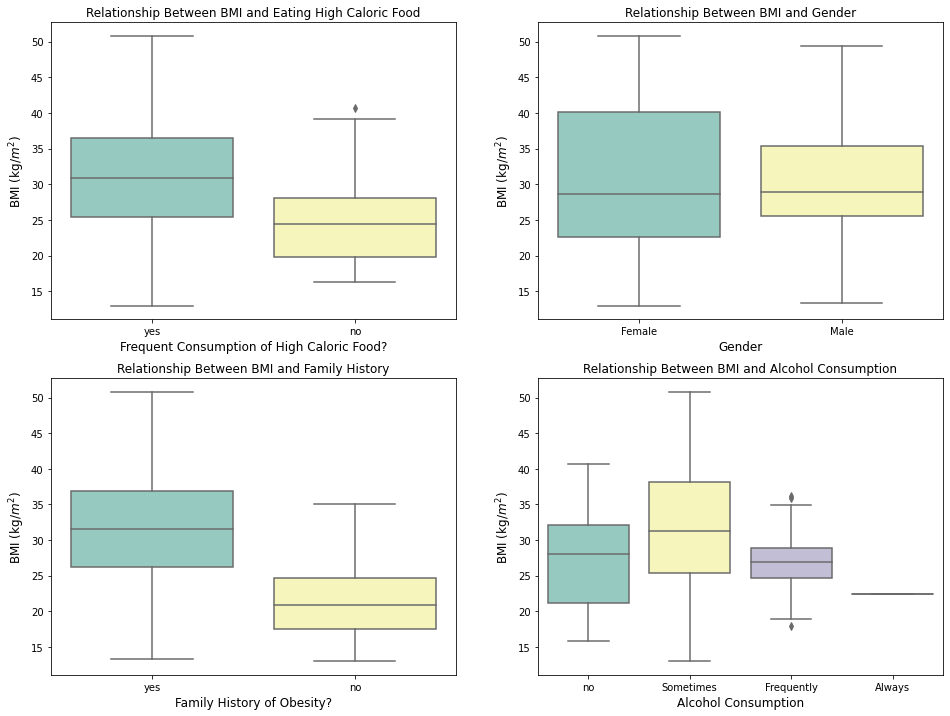

In [12]:
plt.figure(figsize=(16,12))

#subplot 1: high caloric food 
plt.subplot(2, 2, 1)
sns.boxplot(x = "FAVC", y = 'BMI', order=["yes", "no"],data = df, palette = "Set3").set_title('Relationship Between BMI and Eating High Caloric Food')
plt.xlabel("Frequent Consumption of High Caloric Food?", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 2: gender
plt.subplot(2, 2, 2)
sns.boxplot(x = 'Gender', y = 'BMI', data = df, palette = "Set3").set_title('Relationship Between BMI and Gender')
plt.xlabel("Gender", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)


#subplot 3: family history
plt.subplot(2, 2, 3)
sns.boxplot(x = 'family_history_with_overweight', y = 'BMI', data = df, palette = "Set3").set_title('Relationship Between BMI and Family History')
plt.xlabel("Family History of Obesity?", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 4: alcohol consumption
plt.subplot(2, 2, 4)
sns.boxplot(x = 'CALC', y = 'BMI', data = df, palette = "Set3").set_title('Relationship Between BMI and Alcohol Consumption')
plt.xlabel("Alcohol Consumption", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)



plt.show()

Text(0, 0.5, 'BMI (kg/$m^2$)')

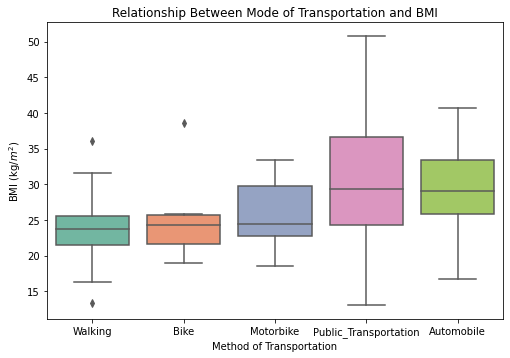

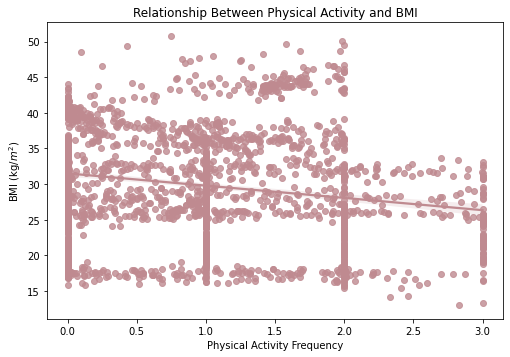

In [13]:
# Relationship Between BMI and Mode of Transportation
plt.figure(figsize=(18,12))
#subplot 1: transportation and BMI
plt.subplot(2, 2, 1)
sns.boxplot(x = 'MTRANS', y = 'BMI', data = df, order=["Walking","Bike","Motorbike","Public_Transportation", "Automobile"], palette = "Set2").set_title('Relationship Between Mode of Transportation and BMI')
plt.xlabel("Method of Transportation")
plt.ylabel("BMI (kg/$m^2$)")

#subplot 2: physical activity and BMI
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 2)
sns.regplot(x=df.FAF, y=df.BMI, color='#bf8a90').set_title('Relationship Between Physical Activity and BMI')
plt.xlabel("Physical Activity Frequency")
plt.ylabel("BMI (kg/$m^2$)")




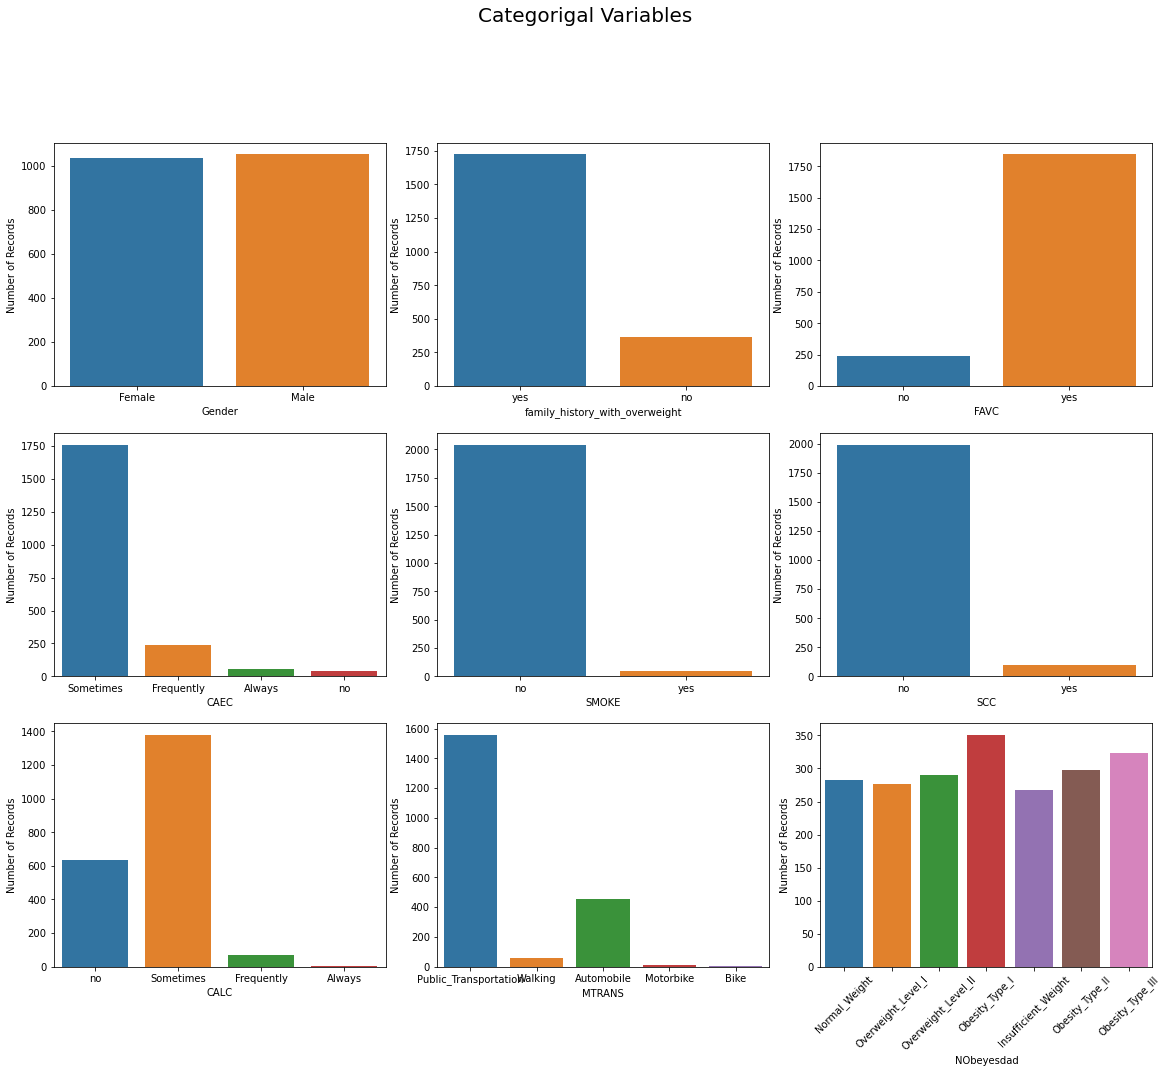

In [14]:
# Check distribution of Variables
# columns of interest
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(18, 16))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(df[col],ax=subplot)
        plt.xticks(rotation=45)        
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(df[col],ax=subplot)
        plt.xticks(rotation = 45)  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(df[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=7, w_pad=0.5, h_pad=1.5)
plt.show()


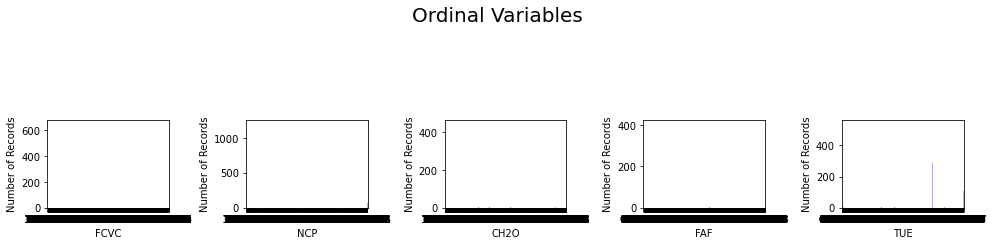

In [15]:
# columns of interest
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

In [16]:
df['NObeyesdad'] = df['NObeyesdad'].replace("Overweight_Level_I", int("1"))
df['NObeyesdad'] = df['NObeyesdad'].replace("Overweight_Level_II", int("1"))
df['NObeyesdad'] = df['NObeyesdad'].replace("Overweight_Level_III", int("1"))
df['NObeyesdad'] = df['NObeyesdad'].replace("Insufficient_Weight", int("1"))
df['NObeyesdad'] = df['NObeyesdad'].replace("Normal_Weight", int("1"))

df['NObeyesdad'] = df['NObeyesdad'].replace("Obesity_Type_I", int("0"))
df['NObeyesdad'] = df['NObeyesdad'].replace("Obesity_Type_II", int("0"))
df['NObeyesdad'] = df['NObeyesdad'].replace("Obesity_Type_III", int("0"))

df['Gender'] = df['Gender'].replace("Female", int('0'))
df['Gender'] = df['Gender'].replace("Male", int('1'))

df['family_history_with_overweight'] = df['family_history_with_overweight'].replace("yes", int('1'))
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace("no", int('0'))

df['FAVC'] = df['FAVC'].replace("yes", int('1'))
df['FAVC'] = df['FAVC'].replace("no", int('2'))

df['FCVC'] = df['FCVC'].replace("Never", int('1'))
df['FCVC'] = df['FCVC'].replace("Sometimes", int('2'))
df['FCVC'] = df['FCVC'].replace("Always", int('3'))

df['CAEC'] = df['CAEC'].replace("no", int('1'))
df['CAEC'] = df['CAEC'].replace("Sometimes", int('2'))
df['CAEC'] = df['CAEC'].replace("Frequently", int('3'))
df['CAEC'] = df['CAEC'].replace("Always", int('4'))

df['SMOKE'] = df['SMOKE'].replace("yes", int('1'))
df['SMOKE'] = df['SMOKE'].replace("no", int('2'))

df['SCC'] = df['SCC'].replace("yes", int('1'))
df['SCC'] = df['SCC'].replace("no", int('2'))

df['CALC'] = df['CALC'].replace("no", int('1'))
df['CALC'] = df['CALC'].replace("Sometimes", int('2'))
df['CALC'] = df['CALC'].replace("Frequently", int('3'))
df['CALC'] = df['CALC'].replace("Always", int('4'))

df['MTRANS'] = df['MTRANS'].replace("Automobile", int('1'))
df['MTRANS'] = df['MTRANS'].replace("Motorbike", int('2'))
df['MTRANS'] = df['MTRANS'].replace("Bike", int('3'))
df['MTRANS'] = df['MTRANS'].replace("Public_Transportation", int('4'))
df['MTRANS'] = df['MTRANS'].replace("Walking", int('5'))


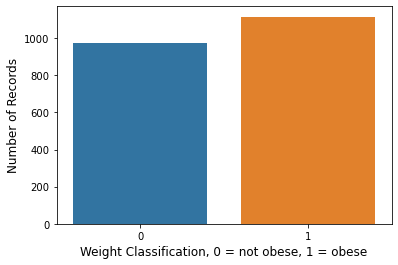

In [17]:
#Distribution of the target variable via countplot

sns.countplot(x='NObeyesdad', data=df)
plt.xlabel("Weight Classification, 0 = not obese, 1 = obese", size=12)
plt.ylabel("Number of Records", size=12)
plt.show()

In [18]:
#Drop the weight variable
df.drop(['Weight','BMI'],axis = 1, inplace = True)

In [19]:
#import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,recall_score,precision_score,accuracy_score)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from yellowbrick.features import FeatureImportances
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport

### Note:
Eating Habit:
- `FAVC` : Frequent consumption of high caloric food 
- `FCVC` : Frequency of consumption of vegetables
- `NCP` :  Number of main meals   
- `CAEC`: Consumption of food between meals 
- `CH20`: Consumption of water daily 
- `CALC`: Consumption of alcohol

Physical condition:
- `SCC`: Calories consumption monitoring
- `FAF`: Physical activity frequency
- `TUE`: Time using technology devices 
- `MTRANS`:Transportation used 


In [20]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
Data = scaler.fit_transform(df)
cols = ['Gender', 'Age', 'Height', 'family_history_with_overweight',
        'FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC', 'FAF','TUE','CALC',
        'MTRANS','NObeyesdad']
Data = pd.DataFrame(Data, columns=cols)
print(Data.head())

   Gender       Age    Height  family_history_with_overweight  FAVC  FCVC  \
0     0.0  0.148936  0.320755                             1.0   1.0   0.5   
1     0.0  0.148936  0.132075                             1.0   1.0   1.0   
2     1.0  0.191489  0.660377                             1.0   1.0   0.5   
3     1.0  0.276596  0.660377                             0.0   1.0   1.0   
4     1.0  0.170213  0.622642                             0.0   1.0   0.5   

        NCP      CAEC  SMOKE  CH2O  SCC       FAF  TUE      CALC  MTRANS  \
0  0.666667  0.333333    1.0   0.5  1.0  0.000000  0.5  0.000000    0.75   
1  0.666667  0.333333    0.0   1.0  0.0  1.000000  0.0  0.333333    0.75   
2  0.666667  0.333333    1.0   0.5  1.0  0.666667  0.5  0.666667    0.75   
3  0.666667  0.333333    1.0   0.5  1.0  0.666667  0.0  0.666667    1.00   
4  0.000000  0.333333    1.0   0.5  1.0  0.000000  0.0  0.333333    0.75   

   NObeyesdad  
0         1.0  
1         1.0  
2         1.0  
3         1.0  


In [21]:
#Store the feature and target variable
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

print(Data.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (75/25)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2087, 16)
(2087, 15)
(2087,)
(1565, 15)
(522, 15)
(1565,)
(522,)


In [22]:

# Compute the baseline classification accuracy for X_train
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5478927203065134


In [23]:

#Logistic regression accuracy
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, y_pred))

#Cross-validation
cv1 = cross_val_score(logReg, X, y, scoring='accuracy', cv=10)
cv1 = pd.Series(cv1)
print("Cross-validation: ", cv1.mean())

Accuracy of predictions: 0.764367816091954
Cross-validation:  0.7100225432462275


In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
#GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [150, 100, 75, 50, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=10, random_state=42)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.757830 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy of predictions: 0.7681992337164751
Cross-validation:  0.7176826463010674


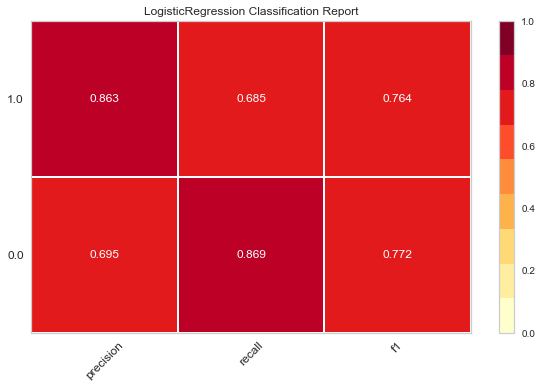

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [25]:
#Log reg with grid search hyperparameters
gridLogReg = LogisticRegression(random_state = 42, penalty = "l2", C = 100, solver = "liblinear")
gridLogReg.fit(X_train, y_train)
grid_pred = gridLogReg.predict(X_test)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, grid_pred))
#cross-validation
gridcv = cross_val_score(gridLogReg, X, y, scoring='accuracy', cv=10)
gridcv = pd.Series(gridcv)
print("Cross-validation: ", gridcv.mean())

from yellowbrick.classifier import ClassificationReport
#Log reg classification report visualizer
visualizer = ClassificationReport(gridLogReg, size=(600, 400), color = '#bf8abf')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Text(0, 0.5, 'Acuracy of Testing')

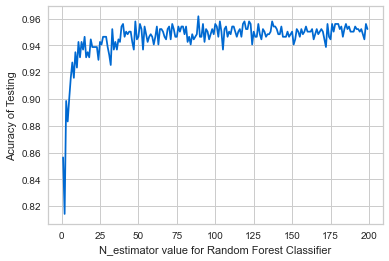

In [26]:
#Random forest n_estimator and testing accuracy
scoresrf =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_predrf = rfc.predict(X_test)
    scoresrf.append(accuracy_score(y_test, y_predrf))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 200), scoresrf, color = '#0069d1')
plt.xlabel('N_estimator value for Random Forest Classifier')
plt.ylabel('Acuracy of Testing')

In [27]:
#Random Forest model
model_rf = RandomForestClassifier(n_estimators=135, max_features= 6, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy:", accuracy_rf)
#cross-validation
rfcv = cross_val_score(model_rf, X, y, scoring='accuracy', cv=10)
rfcv = pd.Series(rfcv)
print("Cross-validation: ", rfcv.mean())

Accuracy: 0.9540229885057471
Cross-validation:  0.9362808244387191


<AxesSubplot:>

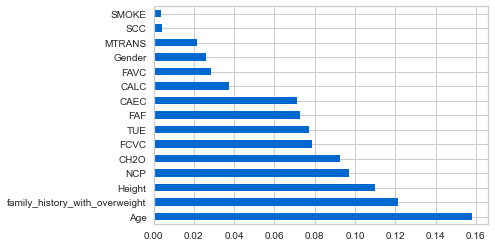

In [28]:

#Random forest feature importance
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color = '#0069d1' )

In [29]:
# Top 3 features for RandomForest
rimp=pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
rfimp = (rimp.sort_values(1, ascending = False))
print("Three most important features: \n", rfimp.iloc[:3])

Three most important features: 
                                 0         1
1                             Age  0.158304
3  family_history_with_overweight  0.121149
2                          Height  0.110173


In [30]:
print('Classification Report:\n')
print(classification_report(y_test, y_predrf))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       236
         1.0       0.95      0.96      0.96       286

    accuracy                           0.95       522
   macro avg       0.95      0.95      0.95       522
weighted avg       0.95      0.95      0.95       522

